# Análisis instalaciones

### ¿Cuántas instalaciones se realizaron según la hora del día? 

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

In [7]:
installs_dtypes = {'application_id': 'category', 'ref_type': 'category', 'device_countrycode': 'category',
                   'device_brand': 'category', 'device_model' : 'category', 'session_user_agent': 'category',
                   'user_agent': 'category', 'kind': 'category', 'device_language': 'category'}

installs = pd.read_csv('installs.csv', dtype = installs_dtypes)

installs["created"] =  pd.to_datetime(installs["created"], errors = "coerce") #parseo de fechas

installs.drop('attributed', axis = 1, inplace = True) #son todas false
installs.drop('click_hash', axis = 1, inplace = True) #son todas NaN

In [8]:
installs['hora'] = installs['created'].dt.hour
installs['cant'] = 1

Text(0, 0.5, 'Hora')

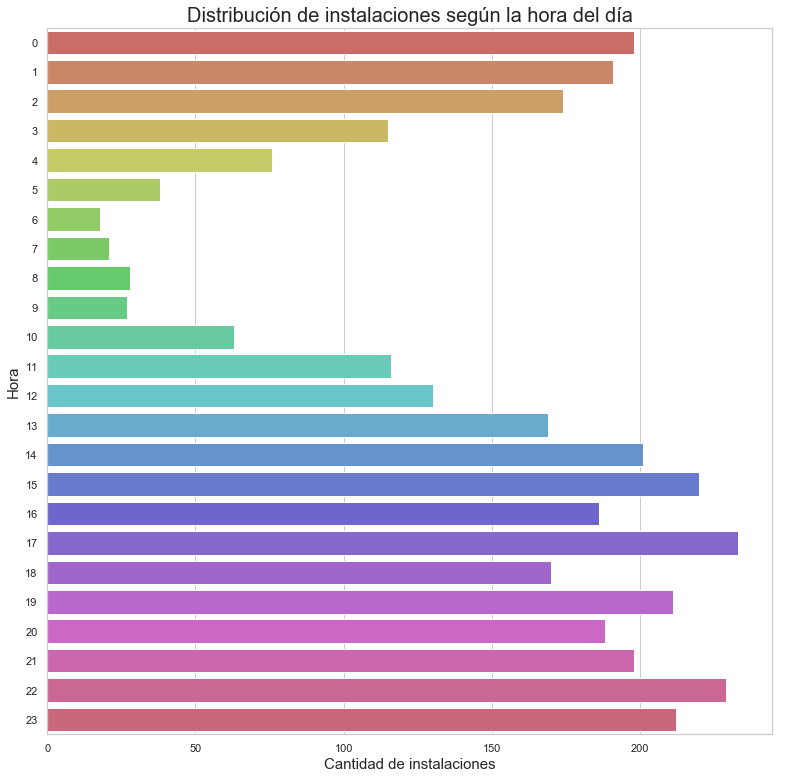

In [14]:
plt.rcParams['figure.figsize'] = (13, 13)

group_installs = installs.groupby('hora').agg({'cant':'count'}).reset_index()

graph = sns.barplot(x= group_installs['cant'], y = group_installs['hora'], orient='h', palette="hls")
graph.set_title("Distribución de instalaciones según la hora del día", fontsize = 20)
graph.set_xlabel("Cantidad de instalaciones", fontsize = 15)  #fontdict = font para cambiar la fuente
graph.set_ylabel("Hora", fontsize = 15)

### ¿Cómo se distribuyen las instalaciones según la franja horaria del día?

In [38]:
# Mañana 7 8 9 10
# Mediodia 11 12 13 14
# Tarde 15 16 17 18
# Tarde-Noche 19 20 21 22
# Noche 22 23 24 1 
# Madrugada 2 3 4 5

def calcular_franja_horaria(serie):
    data = []    
    for hora in serie:
        if hora in [5,6,7,8]:
            data.append("Mañana\n(5am-8am)")
        elif hora in [9,10,11,12]:
            data.append("Media mañana-Mediodía\n(9am-12pm)")
        elif hora in [13,14,15,16]:
            data.append("Tarde\n(13pm-16pm)")
        elif hora in [17,18,19,20]:
            data.append("Tarde-Noche\n(17pm-20pm)")
        elif hora in [21,22,23,24]:
            data.append("Noche\n(21pm-24am)")
        elif hora in [1,2,3,4]:
            data.append("Madrugada\n(1am-4am)")    

    return pd.Series(data)

In [39]:
installs['franja_horaria'] = calcular_franja_horaria(installs['hora'])

Text(0, 0.5, 'Franja horaria')

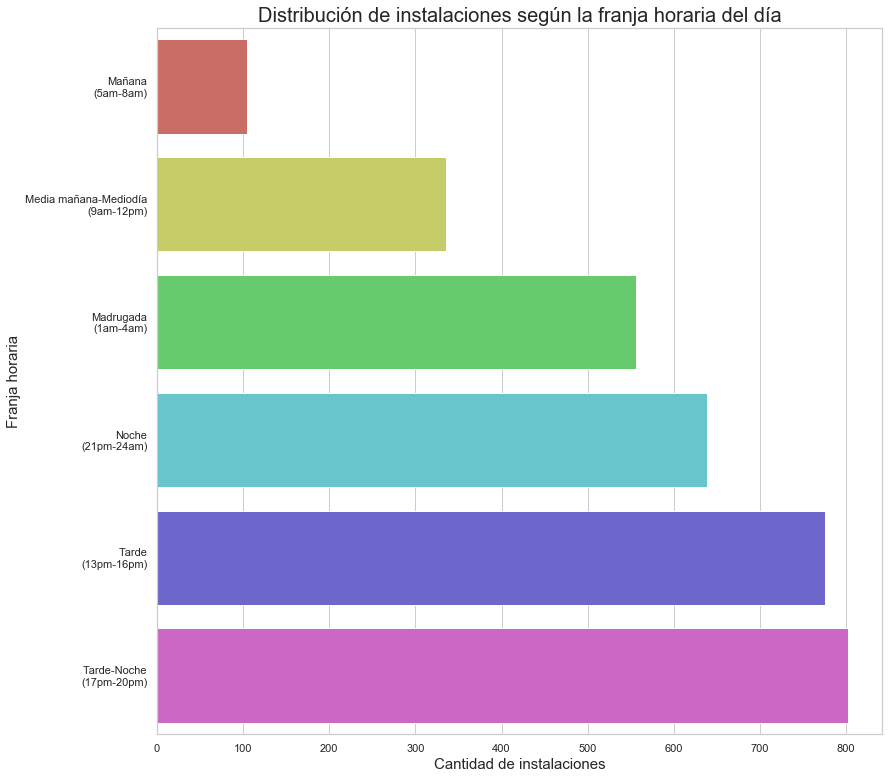

In [40]:
plt.rcParams['figure.figsize'] = (13, 13)

group_installs_franja = installs.groupby('franja_horaria').agg({'cant':'count'}).reset_index().sort_values(by = 'cant')

graph = sns.barplot(x= group_installs_franja['cant'], y = group_installs_franja['franja_horaria'], orient='h', palette="hls")
graph.set_title("Distribución de instalaciones según la franja horaria del día", fontsize = 20)
graph.set_xlabel("Cantidad de instalaciones", fontsize = 15)  #fontdict = font para cambiar la fuente
graph.set_ylabel("Franja horaria", fontsize = 15)